# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
%pip install wordcloud

# Data Analysis

In [3]:
#Load the data

data = pd.read_csv('RateMyProfessor_Sample data.csv')

print(f"Dataset shape : {data.shape}")

Dataset shape : (20000, 51)


In [4]:
data.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [5]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['professor_name' 'school_name' 'department_name' 'local_name'
 'state_name' 'year_since_first_review' 'star_rating' 'take_again'
 'diff_index' 'tag_professor' 'num_student' 'post_date' 'name_onlines'
 'name_not_onlines' 'student_star' 'student_difficult' 'attence'
 'for_credits' 'would_take_agains' 'grades' 'help_useful'
 'help_not_useful' 'comments' 'word_comment' 'gender' 'race' 'asian'
 'hispanic' 'nh_black' 'nh_white' 'gives_good_feedback' 'caring'
 'respected' 'participation_matters' 'clear_grading_criteria' 'skip_class'
 'amazing_lectures' 'inspirational' 'tough_grader' 'hilarious'
 'get_ready_to_read' 'lots_of_homework' 'accessible_outside_class'
 'lecture_heavy' 'extra_credit' 'graded_by_few_things' 'group_projects'
 'test_heavy' 'so_many_papers' 'beware_of_pop_quizzes' 'IsCourseOnline']


In [6]:
#Check for null values

data.isnull().sum()

professor_name                  0
school_name                     0
department_name                 0
local_name                      0
state_name                      0
year_since_first_review         0
star_rating                     0
take_again                  17002
diff_index                      0
tag_professor                8907
num_student                     0
post_date                       5
name_onlines                    0
name_not_onlines                5
student_star                    5
student_difficult               5
attence                     15991
for_credits                 15947
would_take_agains           17418
grades                      16708
help_useful                     0
help_not_useful                 0
comments                        7
word_comment                    7
gender                          0
race                            0
asian                           0
hispanic                        0
nh_black                        0
nh_white      

In [7]:
#Getting the record where 'comments' is null

data[data['comments'].isna() == True]

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
126,Lauren Bold,Gratz College (Regional Training Center),Education department,Philadelphia area,PA,7,4.8,NaN,2.3,NaN,...,0,0,0,0,0,0,0,0,0,0
693,Sharon Teague,Rhode Island College,History department,Providence,RI,3,2.3,NaN,3.8,NaN,...,0,0,0,0,0,0,0,0,0,0
694,Sharon Teague,Rhode Island College,History department,Providence,RI,3,2.3,NaN,3.8,NaN,...,0,0,0,0,0,0,0,0,0,0
695,Sharon Teague,Rhode Island College,History department,Providence,RI,3,2.3,NaN,3.8,NaN,...,0,0,0,0,0,0,0,0,0,0
696,Sharon Teague,Rhode Island College,History department,Providence,RI,3,2.3,NaN,3.8,NaN,...,0,0,0,0,0,0,0,0,0,0
697,Sharon Teague,Rhode Island College,History department,Providence,RI,3,2.3,NaN,3.8,NaN,...,0,0,0,0,0,0,0,0,0,0
4185,Steven Schlossman,Carnegie Mellon University,History department,Pittsburgh,PA,9,4.9,NaN,3.3,NaN,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#We will drop the null record

data.dropna(subset=['comments'], inplace=True)

In [9]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (19993, 51)


In [10]:
data.dtypes

professor_name               object
school_name                  object
department_name              object
local_name                   object
state_name                   object
year_since_first_review       int64
star_rating                 float64
take_again                   object
diff_index                  float64
tag_professor                object
num_student                   int64
post_date                    object
name_onlines                 object
name_not_onlines             object
student_star                float64
student_difficult           float64
attence                      object
for_credits                  object
would_take_agains            object
grades                       object
help_useful                   int64
help_not_useful               int64
comments                     object
word_comment                float64
gender                       object
race                         object
asian                       float64
hispanic                    

In [11]:
len(data)

19993

# Analyzing 'rating' column

In [12]:
#Distinct values of 'rating' and its count

print(f"Rating Count: \n{data['student_star'].value_counts()}")

Rating Count: 
1.0    12930
0.0     7063
Name: student_star, dtype: int64


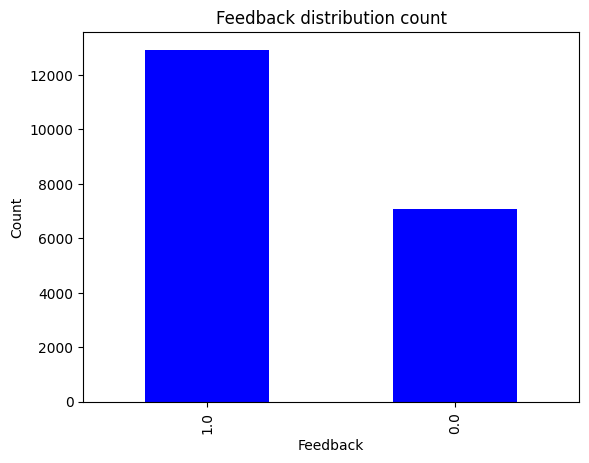

In [13]:
#Bar graph to visualize the total counts of each feedback

data['student_star'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [14]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['student_star'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1.0    64.67
0.0    35.33
Name: student_star, dtype: float64


In [18]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_5 = data[data['student_star'] == 1].iloc[90]['comments']
print(review_5)

I never thought I would like a writing class. She is very nice and helpfull. Good looking also.


In [19]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_1 = data[data['student_star'] == 0].iloc[90]['comments']
print(review_1)

I believe that he may be a great architect but as a teacher, it needs a lot of work, because I had trouble in that class.


# Analyzing comments column

In [20]:
cv = CountVectorizer(stop_words='english')


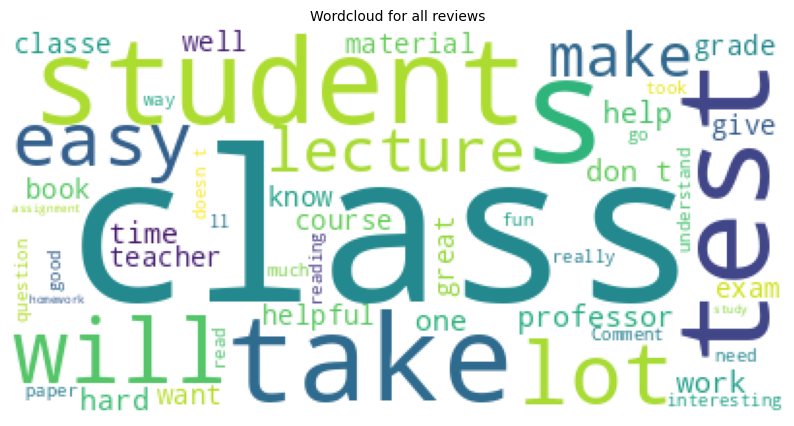

In [21]:
# Combine all reviews
reviews = " ".join([review for review in data['comments']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [22]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['student_star'] == 0]['comments']])
neg_reviews = neg_reviews.lower().split()



pos_reviews = " ".join([review for review in data[data['student_star'] == 1]['comments']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)



unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

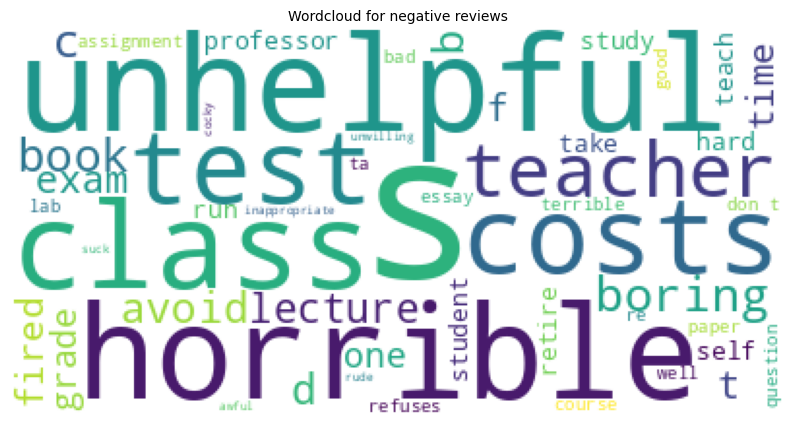

In [23]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

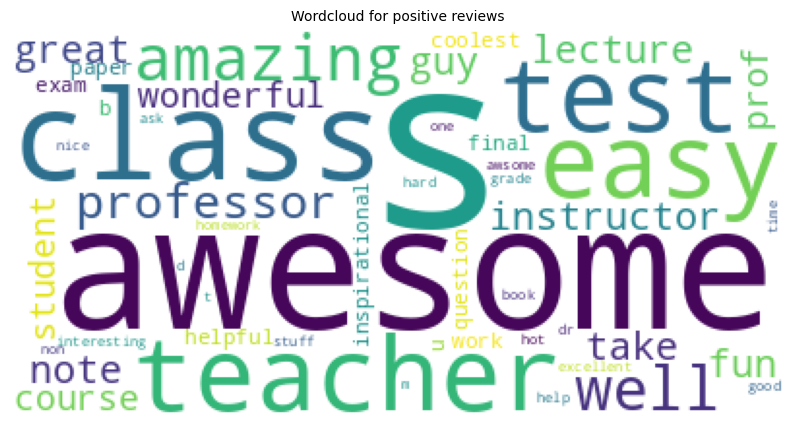

In [24]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# Preprocessing and Modelling
To build the corpus from the 'verified_reviews' we perform the following -

1. Replace any non alphabet characters with a space
2. Convert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add  the stemmed form of the word to the corpus





# Corpus
In the context of Natural Language Processing (NLP), a corpus (plural: corpora) refers to a large collection of text data that is used to train and develop NLP models and applications. Here's a breakdown of the key characteristics and purposes of corpora in NLP:

# PorterStemmer
In Natural Language Processing (NLP), PorterStemmer is a well-known algorithm used for stemming, a text pre-processing technique. Stemming aims to reduce words to their base or root form, also known as the stem.

In [25]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['comments'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

# Count Vectorizer
CountVectorizer is a technique used in Natural Language Processing (NLP) to convert a collection of text documents into a numerical representation suitable for machine learning algorithms. It works by counting the occurrences of words (or n-grams) in each document and creating a document-term matrix.

Here's a breakdown of how CountVectorizer works:

1. Text Preprocessing (Optional):

CountVectorizer can perform some basic text preprocessing tasks like converting text to lowercase and removing punctuation. You can control these options during initialization.
2. Vocabulary Building:

It analyzes all the text documents and creates a vocabulary of unique words (or n-grams, if specified) encountered across the documents.
3. Document-Term Matrix Creation:

CountVectorizer creates a matrix where rows represent documents and columns represent terms (unique words or n-grams) from the vocabulary.
Each cell in the matrix holds the count of how many times a particular term appears in the corresponding document.

Using Count Vectorizer to create bag of words

In [26]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['student_star'].values

# Pickle
In machine learning, a pickle (referring to the Python pickle module) is a technique used for serializing objects. Serialization is the process of converting an object (like a Python data structure or a trained machine learning model) into a byte stream that can be stored in a file or transmitted over a network.

Here's a breakdown of how pickling works in machine learning:

1. Object Serialization:

When you pickle a machine learning model, the pickle module takes the model object and analyzes its internal state, including its parameters, weights, and configuration.
It then converts this information into a byte stream, essentially a sequence of bytes, that represents the complete state of the model.
2. Benefits:

Model Persistence: Pickling allows you to save trained machine learning models to files. This is crucial because training models can be time-consuming and resource-intensive. By pickling the model, you can save its state and reuse it later for predictions without retraining from scratch.
Model Sharing: You can share pickled models with others. This can be helpful for collaboration, deployment, or integrating the model into web applications.
3. De-serialization:

When you want to use a pickled model, you use the pickle.load() function to load the byte stream from the file.
The pickle module then takes the byte stream and reconstructs the original model object with its state restored. This allows you to use the model for making predictions on new data.
4. Limitations:

Version Compatibility: Pickled models might not be compatible across different Python versions or if the libraries used for training have undergone significant changes.
Security: Pickling can be a security risk if you're loading untrusted pickled data. It's recommended to only load pickled models from trusted sources.
Limited Object Types: While pickling works for many Python data structures and models, it might not support all object types.

In [27]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

Checking the shape of X and y
* X represents the features or independent variables in your dataset. These are the attributes or measurements used to make predictions. It's typically a two-dimensional array where each row represents a data point and each column represents a feature.
* y represents the target variable or dependent variable in your dataset. This is what you want to predict based on the features in X. It can be a one-dimensional array (for regression tasks) or a two-dimensional array (for multi-class classification tasks).




In [28]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (19993, 2500)
y shape: (19993,)


Splitting data into train and test set with 30% data with testing.

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (15994, 2500)
y train: (15994,)
X test: (3999, 2500)
y test: (3999,)


In [147]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 9
X test max value: 5


We'll scale X_train and X_test so that all values are between 0 and 1.

In [148]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [149]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# XgBoost
XGBoost, which stands for eXtreme Gradient Boosting, is an algorithm used for machine learning tasks, particularly those involving regression and classification. It's known for its efficiency, accuracy, and scalability, making it a popular choice for various applications.

Here's a breakdown of key aspects of XGBoost:

Ensemble Learning:

XGBoost doesn't rely on a single model; instead, it combines predictions from multiple weak learners (often decision trees) to create a stronger final model.
Each weak learner focuses on correcting the errors of the previous ones, leading to a more robust and accurate ensemble model.
Gradient Boosting:

This technique builds the model iteratively. In each step, a new model is added to the ensemble that tries to improve upon the predictions of the existing models.
XGBoost uses a gradient descent optimization algorithm to minimize the loss function (measure of error) during training.
Strengths of XGBoost:

High Accuracy: XGBoost is known for achieving excellent performance on various machine learning tasks. It's often a top contender in Kaggle competitions.
Scalability: It can handle large datasets efficiently due to its optimized implementation and support for parallel processing.
Regularization: It incorporates techniques like L1 and L2 regularization to prevent overfitting and improve model generalization.
Feature Importance: XGBoost provides insights into feature importance, helping you understand which features contribute most to the model's predictions.
Missing Value Handling: It can handle missing values in data effectively.
Common Applications:

Sentiment Analysis: Classifying text into positive, negative, or neutral sentiment.
Recommendation Systems: Predicting user preferences for products or services.
Fraud Detection: Identifying fraudulent transactions.
Churn Prediction: Predicting customers who are at risk of leaving.
Image Recognition: Classifying images into different categories.
Learning XGBoost:

Several libraries like scikit-learn (Python) provide XGBoost implementations.
Online tutorials and resources can help you get started with XGBoost and explore its capabilities.
In essence, XGBoost is a powerful and versatile machine learning algorithm that leverages ensemble learning and gradient boosting to achieve high accuracy and scalability across various tasks. It's a popular choice for data scientists and machine learning practitioners due to its effectiveness and rich set of features.

In [141]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [150]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.845442040765287
Testing Accuracy : 0.8482120530132533


In [41]:
y_preds = model_xgb.predict(X_test)

In [43]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[1320  831]
 [ 355 3492]]


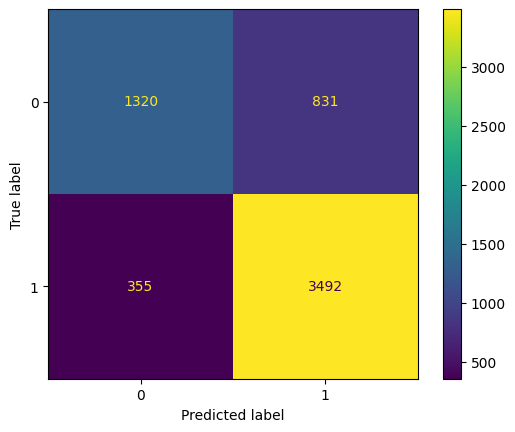

In [44]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

# Decision Tree Classifier


In [76]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [143]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9746337977849232
Testing Accuracy : 0.8256085361787262


# Random Forest

In [100]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [151]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9409778667000125
Testing Accuracy : 0.9382345586396599


In [47]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

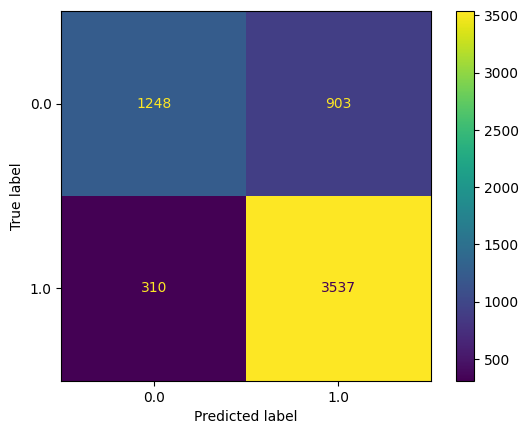

In [49]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()